In [1]:
# ! pip install pymysql
# ! pip install --upgrade sqlalchemy
# ! pip show sqlalchemy



Name: SQLAlchemy
Version: 1.4.39
Summary: Database Abstraction Library
Home-page: https://www.sqlalchemy.org
Author: Mike Bayer
Author-email: mike_mp@zzzcomputing.com
License: MIT
Location: C:\Users\Acer\.conda\envs\bengkelkoding\Lib\site-packages
Requires: greenlet
Required-by: 


# CONVERT TO SQL


In [1]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




In [17]:
campaign = pd.read_csv('Campaign-Grid view.csv')
customer = pd.read_csv('Customer-Grid view.csv')
transaksi = pd.read_csv('Transaksi-Grid view.csv')

In [18]:
campaign.head()
campaign = campaign.rename(columns={'Start Date':'Start_Date','End Date	':'End_Date'})

In [19]:
campaign.head()


,Name,Start_Date,End Date,Budget
0,Campaign 1,1/1/2021,31/1/2021,Rp10000000.00
1,Campaign 2,1/2/2021,28/2/2021,Rp14000000.00
2,Campaign 3,1/3/2021,31/3/2021,Rp23000000.00
3,Campaign 4,1/4/2021,30/4/2021,Rp35000000.00
4,Campaign 5,1/5/2021,31/5/2021,Rp36000000.00


In [20]:
customer.head()

,Name,Domisili,Usia
0,Chi,Bali,32
1,Dubaku,Bali,28
2,Taurai,Jakarta,35
3,Thokozani,Luar Indonesia,36
4,Ufuoma,Bali,48


In [21]:
transaksi.head()
transaksi = transaksi.rename(columns={'Tanggal Transaksi':'Tanggal_Transaksi','Nama Sales':'Nama_Sales','Harga Asli':'Harga_Asli'
                                      ,'Tipe Produk':'Tipe_Produk'})

In [22]:
transaksi.head()


,Tanggal_Transaksi,Nama_Sales,Harga_Asli,Customer,Tipe_Produk
0,28/2/2021,Octroy,Rp41000.00,Ade,Produk A
1,9/2/2021,Aini,Rp270000.00,Qayug,Produk A
2,26/3/2021,Octroy,Rp255000.00,Ixoim,Produk D
3,20/3/2021,Octroy,Rp1025000.00,Yinoh,Produk C
4,4/4/2021,Agus,Rp130000.00,Hoosnestrond,Produk C


In [35]:
connection_string = "mysql+pymysql://root:@localhost:3306/schoters"
engine = create_engine(connection_string)


In [28]:
# customer.to_sql('customer',engine,if_exists="append")
# campaign.to_sql('campaign',engine,if_exists="append")
# transaksi.to_sql('transaksi',engine,if_exists="append")


7

# VISUALIZATION

In [2]:
campaign = pd.read_csv('campaign.csv')
transaksi = pd.read_csv('transaksi.csv')
customer = pd.read_csv('customer.csv')


In [3]:
customer.head()

,index,Name,Domisili,Usia,id_cust
0,5,Abdoul,Bali,12,1
1,19,Ade,Jawa Barat,42,2
2,9,Adegoke,Luar Indonesia,41,3
3,50,Axzab,Jakarta,24,4
4,47,Bluaxia,Jawa Barat,11,5


In [4]:
transaksi.head()

,index,Tanggal_Transaksi,Nama_Sales,Harga_Asli,Customer,Tipe_Produk,id_cust,id_campaign,BT,Bulantahun
0,0,28/2/2021,Octroy,Rp41000.00,Ade,Produk A,2,2.0,20212,2021-02-28
1,1,9/2/2021,Aini,Rp270000.00,Qayug,Produk A,42,2.0,20212,2021-02-09
2,2,26/3/2021,Octroy,Rp255000.00,Ixoim,Produk D,26,3.0,20213,2021-03-26
3,3,20/3/2021,Octroy,Rp1025000.00,Yinoh,Produk C,55,3.0,20213,2021-03-20
4,4,4/4/2021,Agus,Rp130000.00,Hoosnestrond,Produk C,24,4.0,20214,2021-04-04


In [5]:
transaksi['Bulantahun'] = pd.to_datetime(transaksi['Bulantahun']).dt.strftime('%Y-%m')

In [6]:
transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              441 non-null    int64  
 1   Tanggal_Transaksi  441 non-null    object 
 2   Nama_Sales         441 non-null    object 
 3   Harga_Asli         441 non-null    object 
 4   Customer           441 non-null    object 
 5   Tipe_Produk        441 non-null    object 
 6   id_cust            441 non-null    int64  
 7   id_campaign        433 non-null    float64
 8   BT                 441 non-null    int64  
 9   Bulantahun         441 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 34.6+ KB


In [7]:
grouped_df = transaksi.groupby('Bulantahun').agg({'Tipe_Produk': 'count', 
                            'Harga_Asli': lambda x: np.sum(x.str.replace(',', '').str.replace('Rp', '').astype(float))})


In [8]:
grouped_df.columns = ['jumlah_produk', 'total_untung']
grouped_df = grouped_df.sort_index()


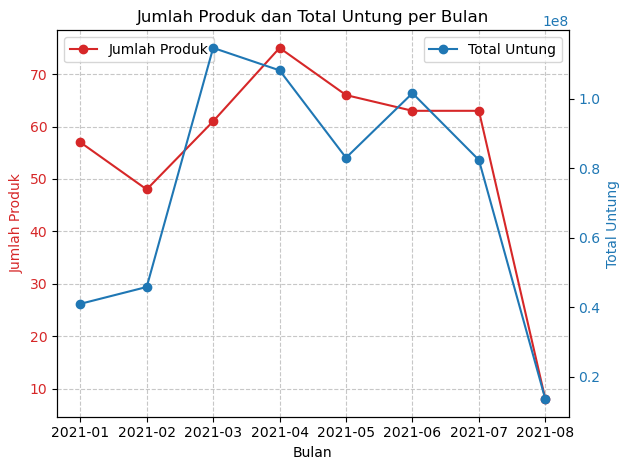

In [9]:


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Bulan')
ax1.set_ylabel('Jumlah Produk', color=color)
ax1.plot(grouped_df.index, grouped_df['jumlah_produk'], color=color, marker='o', label='Jumlah Produk')
ax1.tick_params(axis='y', labelcolor=color)

plt.title('Jumlah Produk dan Total Untung per Bulan')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Untung', color=color)
ax2.plot(grouped_df.index, grouped_df['total_untung'], color=color, marker='o', label='Total Untung')
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid(True, linestyle='--', alpha=0.7)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()

plt.show()


In [10]:
temp = transaksi.groupby('Bulantahun')['id_campaign'].sum().reset_index()
temp = pd.DataFrame(temp ,columns=['Bulantahun','id_campaign'])
Budget =pd.DataFrame(campaign['Budget'])
temp['Budget'] = Budget
temp['Budget'] = temp['Budget'].str.replace(r'^Rp|\.00$', '', regex=True)
temp['Budget'] = pd.to_numeric(temp['Budget'])
temp.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bulantahun   8 non-null      object 
 1   id_campaign  8 non-null      float64
 2   Budget       7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 324.0+ bytes


In [11]:
temp.head()

,Bulantahun,id_campaign,Budget
0,2021-01,57.0,10000000.0
1,2021-02,96.0,14000000.0
2,2021-03,183.0,23000000.0
3,2021-04,300.0,35000000.0
4,2021-05,330.0,36000000.0


In [12]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bulantahun   8 non-null      object 
 1   id_campaign  8 non-null      float64
 2   Budget       7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 324.0+ bytes


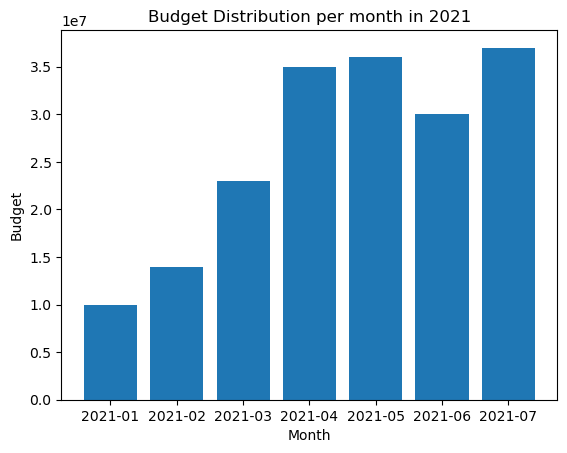

In [13]:
plt.bar(temp['Bulantahun'], temp['Budget'])
plt.xlabel('Month')
plt.ylabel('Budget')
plt.title('Budget Distribution per month in 2021')


plt.show()


In [14]:
temp = transaksi.groupby('Tipe_Produk').count().reset_index()
temp = temp.rename(columns={'index':'Jumlah'})

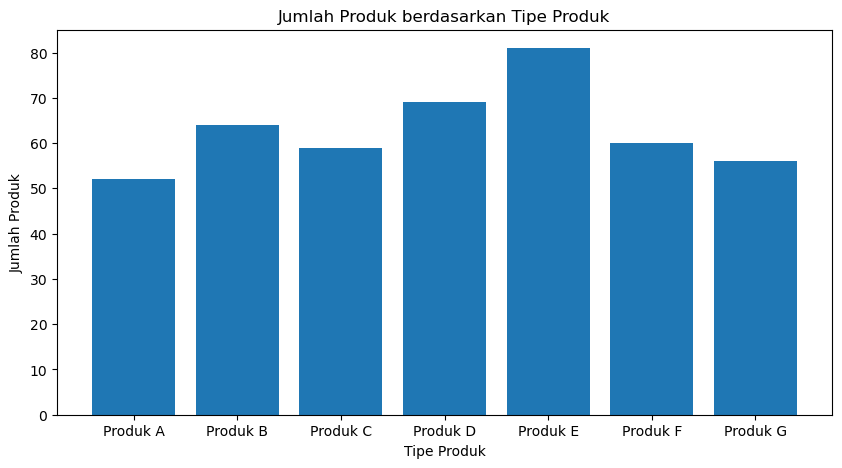

In [131]:
plt.figure(figsize=(10, 5))
plt.bar(temp['Tipe_Produk'], temp['Jumlah'])
plt.xlabel('Tipe Produk')
plt.ylabel('Jumlah Produk')
plt.title('Jumlah Produk berdasarkan Tipe Produk')
plt.xticks(temp['Tipe_Produk'])
plt.show()